## Recursive Neural Networks (RNN)

Una RNN es una clase de redes neuronales artificiales donde las conexiones entre nodos pueden crear un ciclo, lo que permite que la ouput de algunos nodos afecte al input posterior a los mismos nodos.


La principal diferencia es que la red neuronal convencional toma decisiones basadas solo en el input actual, la RNN toma decisiones basadas en los inputs actuales y anteriores.

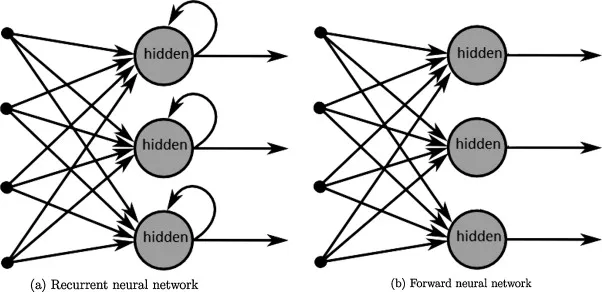

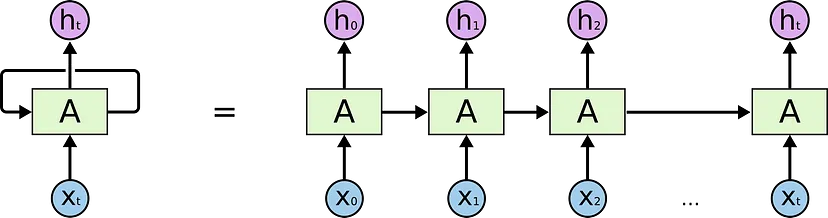

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

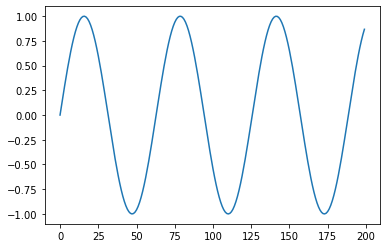

In [2]:
series = np.sin(0.1*np.arange(200))

plt.plot(series)
plt.show()

In [3]:
T = 10 # Segmentos
X = list()
y = list()

for t in range(len(series) - T):
    
    # Toma valores de X de t en t con stride de 1
    x = series[t : t + T]
    X.append(x)
    
    # Toma los valores de t en t
    y_ = series[t + T]
    y.append(y_)

# Transformamos a np.array y ajustamos las dimensiones
# Para entrar en el modelo debe de tener 3 dimensiones
X = np.array(X).reshape(-1, T, 1)
y = np.array(y)
N = len(X)

print(f"X: {X.shape}\ty: {y.shape}")

X: (190, 10, 1)	y: (190,)


In [5]:
#X

In [7]:
#y

### Model - RNN

In [8]:
model = Sequential()

model.add(Input(shape = (T, 1)))
model.add(SimpleRNN(units = 5, activation = "relu"))
model.add(Dense(units = 1))

model.compile(optimizer = "adam", loss = "mse")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 5)                 35        
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Vamos a cortar los datos a la mitad imitando train_test_split()
# Para un problema de RNN se intentan predecir el siguiente número, no un número en una posición aleatorio
# Por eso no tiene sentido usar train_test_split()

history = model.fit(x = X[:-N//2],
                    y = y[:-N//2],
                    validation_data = (X[-N//2:], y[-N//2:]),
                    epochs = 100)

Epoch 1/100
3/3 [==============================] - 1s 114ms/step - loss: 1.5968 - val_loss: 1.3690
Epoch 2/100
3/3 [==============================] - 0s 16ms/step - loss: 1.5673 - val_loss: 1.3434
Epoch 3/100
3/3 [==============================] - 0s 19ms/step - loss: 1.5367 - val_loss: 1.3184
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 1.5073 - val_loss: 1.2939
Epoch 5/100
3/3 [==============================] - 0s 19ms/step - loss: 1.4815 - val_loss: 1.2700
Epoch 6/100
3/3 [==============================] - 0s 17ms/step - loss: 1.4526 - val_loss: 1.2471
Epoch 7/100
3/3 [==============================] - 0s 17ms/step - loss: 1.4263 - val_loss: 1.2249
Epoch 8/100
3/3 [==============================] - 0s 14ms/step - loss: 1.4006 - val_loss: 1.2035
Epoch 9/100
3/3 [==============================] - 0s 17ms/step - loss: 1.3763 - val_loss: 1.1825
Epoch 10/100
3/3 [==============================] - 0s 22ms/step - loss: 1.3510 - val_loss: 1.1623
Epoch 11/100
3/3 [

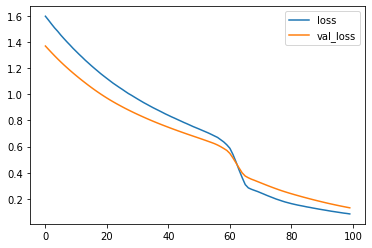

In [10]:
# loss
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.legend()
plt.show()

In [15]:
model.predict(X[-N//2].reshape(1, -1, 1))

1/1 [==============================] - 0s 178ms/step


array([[-0.32108176]], dtype=float32)

### Predicciones

In [16]:
# "1 - Step Predictions"

# Toma un valor y predice el siguiente

validation_target = y[-N//2:]
validation_predictions = list()

i = -N//2

while len(validation_predictions) < len(validation_target):
    
    # Predice el siguiente valor de X[i]
    p = model.predict(X[i].reshape(1, -1, 1))[0, 0]
    i += 1
    
    validation_predictions.append(p)


1/1 [==============================] - 0s 16ms/step


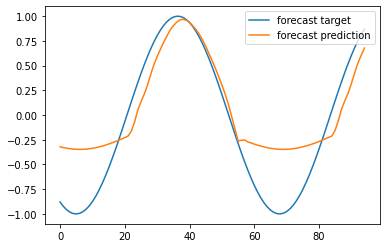

In [17]:
plt.plot(validation_target, label = "forecast target")
plt.plot(validation_predictions, label = "forecast prediction")
plt.legend()
plt.show()

In [18]:
# "Multiple - Step Predictions"

# Toma el último valor de una serie y predice el siguiente
# Usa esa predicción para seguir haciendo predicciones.

validation_target = y[-N//2:]
validation_predictions = list()

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
    
    # En la primera iteración predice el siguiente valor de usando X
    # En las siguientes iteraciones usa el valor predicho anterior para predecir el siguiente
    p = model.predict(last_x.reshape(1, -1, 1))[0, 0]
    
    validation_predictions.append(p)
    print(f"Valor: {last_x[-1][0]}\tPredicción: {p}")
    # Desplaza los elementos en last_x hacia atras, dejando el primer elemento al final
    last_x = np.roll(last_x, -1)
    
    # Cambia el último elemento a la predicción
    last_x[-1] = p

1/1 [==============================] - 0s 20ms/step
Valor: -0.8278264690856537	Predicción: -0.3210817575454712
1/1 [==============================] - 0s 23ms/step
Valor: -0.3210817575454712	Predicción: -0.25426334142684937
1/1 [==============================] - 0s 21ms/step
Valor: -0.25426334142684937	Predicción: -0.23797647655010223
1/1 [==============================] - 0s 16ms/step
Valor: -0.23797647655010223	Predicción: -0.23767124116420746
1/1 [==============================] - 0s 17ms/step
Valor: -0.23767124116420746	Predicción: -0.23581741750240326
1/1 [==============================] - 0s 17ms/step
Valor: -0.23581741750240326	Predicción: -0.23688887059688568
1/1 [==============================] - 0s 16ms/step
Valor: -0.23688887059688568	Predicción: -0.23601384460926056
1/1 [==============================] - 0s 22ms/step
Valor: -0.23601384460926056	Predicción: -0.23667089641094208
1/1 [==============================] - 0s 23ms/step
Valor: -0.23667089641094208	Predicción: -0.2361

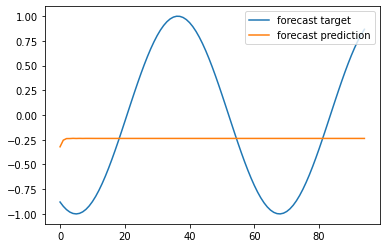

In [19]:
plt.plot(validation_target, label = "forecast target")
plt.plot(validation_predictions, label = "forecast prediction")
plt.legend()
plt.show()

#### Función con ruido

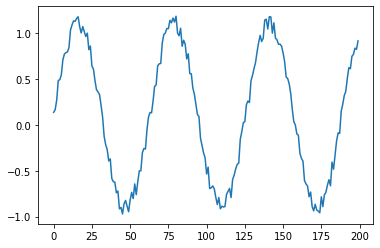

In [20]:
series = np.sin(0.1*np.arange(200)) + np.random.random(200)*0.2

plt.plot(series)
plt.show()

In [21]:
T = 10 # Segmentos
X = list()
y = list()

for t in range(len(series) - T):
    
    # Toma valores de X de t en t con stride de 1
    x = series[t : t + T]
    X.append(x)
    
    # Toma los valores de t en t
    y_ = series[t + T]
    y.append(y_)

# Transformamos a np.array y ajustamos las dimensiones
# Para entrar en el modelo debe de tener 3 dimensiones
X = np.array(X).reshape(-1, T, 1)
y = np.array(y)
N = len(X)

print(f"X: {X.shape}\ty: {y.shape}")

X: (190, 10, 1)	y: (190,)


In [22]:
model = Sequential()

model.add(Input(shape = (T, 1)))
model.add(SimpleRNN(units = 5, activation = "relu"))
model.add(Dense(units = 1))

model.compile(optimizer = "adam", loss = "mse")

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 5)                 35        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(x = X[:-N//2],
                    y = y[:-N//2],
                    validation_data = (X[-N//2:], y[-N//2:]),
                    epochs = 100)

Epoch 1/100
3/3 [==============================] - 1s 90ms/step - loss: 0.7744 - val_loss: 0.7542
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 0.7451 - val_loss: 0.7132
Epoch 3/100
3/3 [==============================] - 0s 16ms/step - loss: 0.7159 - val_loss: 0.6766
Epoch 4/100
3/3 [==============================] - 0s 19ms/step - loss: 0.6882 - val_loss: 0.6426
Epoch 5/100
3/3 [==============================] - 0s 22ms/step - loss: 0.6614 - val_loss: 0.6107
Epoch 6/100
3/3 [==============================] - 0s 34ms/step - loss: 0.6368 - val_loss: 0.5802
Epoch 7/100
3/3 [==============================] - 0s 23ms/step - loss: 0.6091 - val_loss: 0.5512
Epoch 8/100
3/3 [==============================] - 0s 23ms/step - loss: 0.5812 - val_loss: 0.5220
Epoch 9/100
3/3 [==============================] - 0s 18ms/step - loss: 0.5512 - val_loss: 0.4927
Epoch 10/100
3/3 [==============================] - 0s 16ms/step - loss: 0.5216 - val_loss: 0.4645
Epoch 11/100
3/3 [=

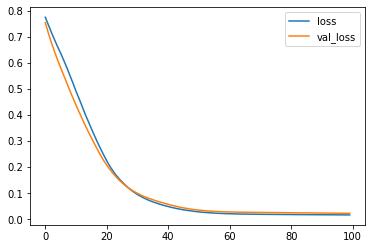

In [24]:
# loss
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.legend()
plt.show()

In [25]:
# "1 - Step Predictions"

# Toma un valor y predice el siguiente

validation_target = y[-N//2:]
validation_predictions = list()

i = -N//2

while len(validation_predictions) < len(validation_target):
    
    # Predice el siguiente valor de X[i]
    p = model.predict(X[i].reshape(1, -1, 1))[0, 0]
    i += 1
    
    validation_predictions.append(p)

1/1 [==============================] - 0s 15ms/step


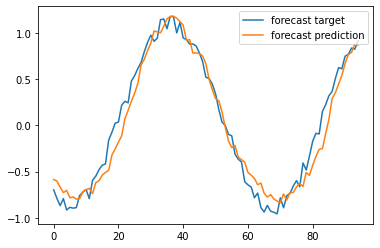

In [26]:
plt.plot(validation_target, label = "forecast target")
plt.plot(validation_predictions, label = "forecast prediction")
plt.legend()
plt.show()

In [27]:
# "Multiple - Step Predictions"

# Toma el último valor de una serie y predice el siguiente
# Usa esa predicción para seguir haciendo predicciones.

validation_target = y[-N//2:]
validation_predictions = list()

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
    
    # En la primera iteración predice el siguiente valor de usando X
    # En las siguientes iteraciones usa el valor predicho anterior para predecir el siguiente
    p = model.predict(last_x.reshape(1, -1, 1))[0, 0]
    
    validation_predictions.append(p)
    print(f"Valor: {last_x[-1][0]}\tPredicción: {p}")
    # Desplaza los elementos en last_x hacia atras, dejando el primer elemento al final
    last_x = np.roll(last_x, -1)
    
    # Cambia el último elemento a la predicción
    last_x[-1] = p

1/1 [==============================] - 0s 20ms/step
Valor: -0.6658744144950561	Predicción: -0.586987316608429
1/1 [==============================] - 0s 19ms/step
Valor: -0.586987316608429	Predicción: -0.5356107950210571
1/1 [==============================] - 0s 16ms/step
Valor: -0.5356107950210571	Predicción: -0.5151953101158142
1/1 [==============================] - 0s 14ms/step
Valor: -0.5151953101158142	Predicción: -0.5026940107345581
1/1 [==============================] - 0s 18ms/step
Valor: -0.5026940107345581	Predicción: -0.5066375732421875
1/1 [==============================] - 0s 16ms/step
Valor: -0.5066375732421875	Predicción: -0.5115357041358948
1/1 [==============================] - 0s 16ms/step
Valor: -0.5115357041358948	Predicción: -0.5208150744438171
1/1 [==============================] - 0s 16ms/step
Valor: -0.5208150744438171	Predicción: -0.5349603891372681
1/1 [==============================] - 0s 14ms/step
Valor: -0.5349603891372681	Predicción: -0.5415100455284119
1/1

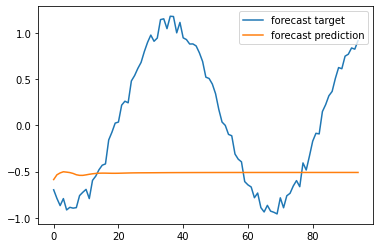

In [28]:
plt.plot(validation_target, label = "forecast target")
plt.plot(validation_predictions, label = "forecast prediction")
plt.legend()
plt.show()

## RNN - MNIST

In [29]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.datasets import mnist

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [30]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_test = X_train/255.0, X_test/255.0

print(f"Train: {X_train.shape}\tTest: {X_test.shape}")

Train: (60000, 28, 28)	Test: (10000, 28, 28)


### Model

In [31]:
model = Sequential()

model.add(Input(shape = X_train[0].shape))
model.add(SimpleRNN(units = 128, activation = "relu"))
model.add(Dense(units = 10, activation = "softmax"))

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 128)               20096     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 21,386
Trainable params: 21,386
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4004 - accuracy: 0.8745 - val_loss: 0.2239 - val_accuracy: 0.9331
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1829 - accuracy: 0.9478 - val_loss: 0.1434 - val_accuracy: 0.9587
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1509 - accuracy: 0.9575 - val_loss: 0.1257 - val_accuracy: 0.9641
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1338 - accuracy: 0.9632 - val_loss: 0.1272 - val_accuracy: 0.9648
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1220 - accuracy: 0.9666 - val_loss: 0.1489 - val_accuracy: 0.9580
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1150 - accuracy: 0.9687 - val_loss: 0.1152 - val_accuracy: 0.9691
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1042 - accuracy: 0.9716 - val_loss: 0.1297 - val_ac

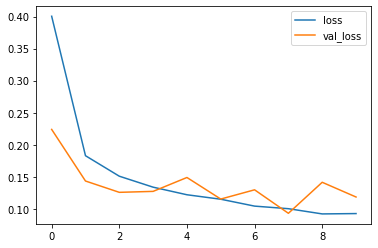

In [33]:
# loss
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.legend()
plt.show()

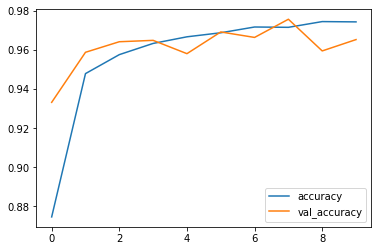

In [34]:
# accuracy
plt.plot(history.history["accuracy"], label = "accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")
plt.legend()
plt.show()

In [35]:
# Predicciones
y_hat = model.predict(X_test)
y_hat = [np.argmax(i) for i in y_hat]

y_hat

313/313 [==============================] - 1s 2ms/step


[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 6,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 4,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


In [36]:
from sklearn.metrics import f1_score

In [37]:
f1_score(y_test, y_hat, average='macro')

0.9646406127537845

In [38]:
confusion_matrix(y_test, y_hat)

array([[ 965,    1,    1,    1,    5,    0,    1,    2,    4,    0],
       [   0, 1128,    2,    1,    0,    0,    2,    0,    2,    0],
       [   2,   13,  970,    6,    2,    0,    4,   16,   19,    0],
       [   0,    5,    1,  983,    1,    5,    0,    3,    1,   11],
       [   0,    2,    0,    0,  968,    0,    2,    0,    4,    6],
       [   2,    1,    2,   15,    7,  795,    9,    4,    6,   51],
       [   9,    3,    0,    0,    6,    1,  937,    0,    2,    0],
       [   0,    9,    4,    0,    0,    0,    0, 1008,    0,    7],
       [   1,    2,    0,    3,    4,    4,    3,    2,  954,    1],
       [   2,    1,    0,    0,   42,    0,    0,    5,   15,  944]],
      dtype=int64)

In [ ]:
################################################################################################################################